In [1]:
#import libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#  From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. 


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#load the dataset
df=pd.read_csv('Iris (1).csv')

In [9]:
#  disply first 5 rows of datasset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
#checking null values in dataset
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
#checking dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
#findout unique values of Species column in the dataset
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
#finding the count of each unique value
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [10]:
df.shape

(150, 6)

In [17]:
#import lableEncoder for assigining the lable to my features
from sklearn.preprocessing import LabelEncoder

In [18]:
#create object of LableEncoder class
le=LabelEncoder()

In [19]:
#assigining the lbles to my 'Species' feature
df['Species']=le.fit_transform(df['Species'])

In [20]:
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [15]:
df.groupby('Species').size()

Species
0    50
1    50
2    50
dtype: int64

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='SepalLengthCm', ylabel='Count'>

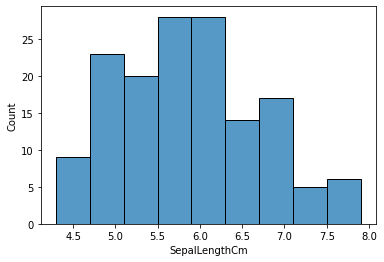

In [48]:
sns.histplot(df['SepalLengthCm'])

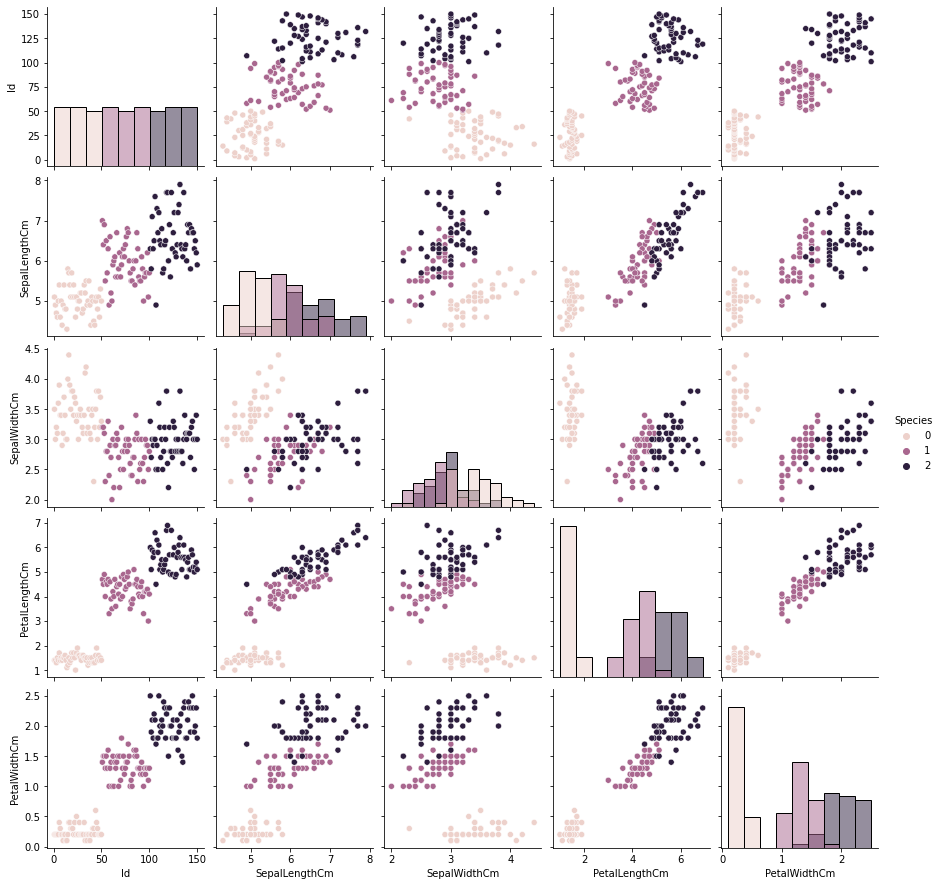

In [56]:
sns.pairplot(df,hue="Species", diag_kind="hist")

In [17]:
#fig, axs = plt.subplots(2, 2)
#fn = ["SepalLengthCm", "SepalWidthCm   ", "petal_length", "petal_width"]
#cn = ['Setosa', 'Versicolor', 'Virginica']
#sns.violinplot(x="Species", y="PetalLengthCm", df=x, size=5, order = cn, palette = 'colorblind');

In [21]:
#find out the correlation
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


<AxesSubplot:>

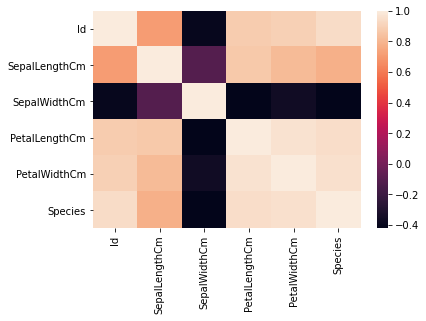

In [22]:
sns.heatmap(df.corr())

In [23]:
#feature selection
x=df.drop(['Id','Species'],axis=1)

In [24]:
y=df[['Species']]

In [25]:
#shape of independent features
x.shape

(150, 4)

In [26]:
#shape of dependent feature
y.shape

(150, 1)

In [28]:
#import train test split libraries
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=  train_test_split(x,y,test_size=0.3,random_state=1)

In [30]:
x_train.shape

(105, 4)

In [31]:
y_train.shape

(105, 1)

In [32]:
x_test.shape

(45, 4)

In [33]:
y_test.shape

(45, 1)

In [34]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
118,7.7,2.6,6.9,2.3
18,5.7,3.8,1.7,0.3
4,5.0,3.6,1.4,0.2
45,4.8,3.0,1.4,0.3
59,5.2,2.7,3.9,1.4
...,...,...,...,...
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
72,6.3,2.5,4.9,1.5
140,6.7,3.1,5.6,2.4


In [35]:
x_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0
56,6.3,3.3,4.7,1.6
141,6.9,3.1,5.1,2.3
44,5.1,3.8,1.9,0.4
29,4.7,3.2,1.6,0.2
120,6.9,3.2,5.7,2.3


In [36]:
y_test

,Species
14,0
98,1
75,1
16,0
131,2
56,1
141,2
44,0
29,0
120,2


In [37]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
118,7.7,2.6,6.9,2.3
18,5.7,3.8,1.7,0.3
4,5.0,3.6,1.4,0.2
45,4.8,3.0,1.4,0.3
59,5.2,2.7,3.9,1.4
...,...,...,...,...
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
72,6.3,2.5,4.9,1.5
140,6.7,3.1,5.6,2.4


In [38]:
y_train

,Species
118,2
18,0
4,0
45,0
59,1
...,...
133,2
137,2
72,1
140,2


In [39]:
#importing the decisiontree classifier model libraries
from sklearn.tree import DecisionTreeClassifier

In [42]:
#create object
model=DecisionTreeClassifier(criterion="gini",max_depth=2)

In [43]:
#train the model usinng object of decision treeclassifier 
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [44]:
#predict the model using object of decision tree classifier 
y_pred=model.predict(x_test)

In [45]:
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

In [46]:
#import the libraries to check the accuracy
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [49]:
accuracy_score(y_test,y_pred)*100

95.55555555555556

In [50]:
model.score(x_test,y_test)*100

95.55555555555556

In [52]:
model.score(x_train,y_train)*100

96.19047619047619

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
from sklearn.tree import plot_tree

In [46]:
#visualizing the decision tree  for IRis classification

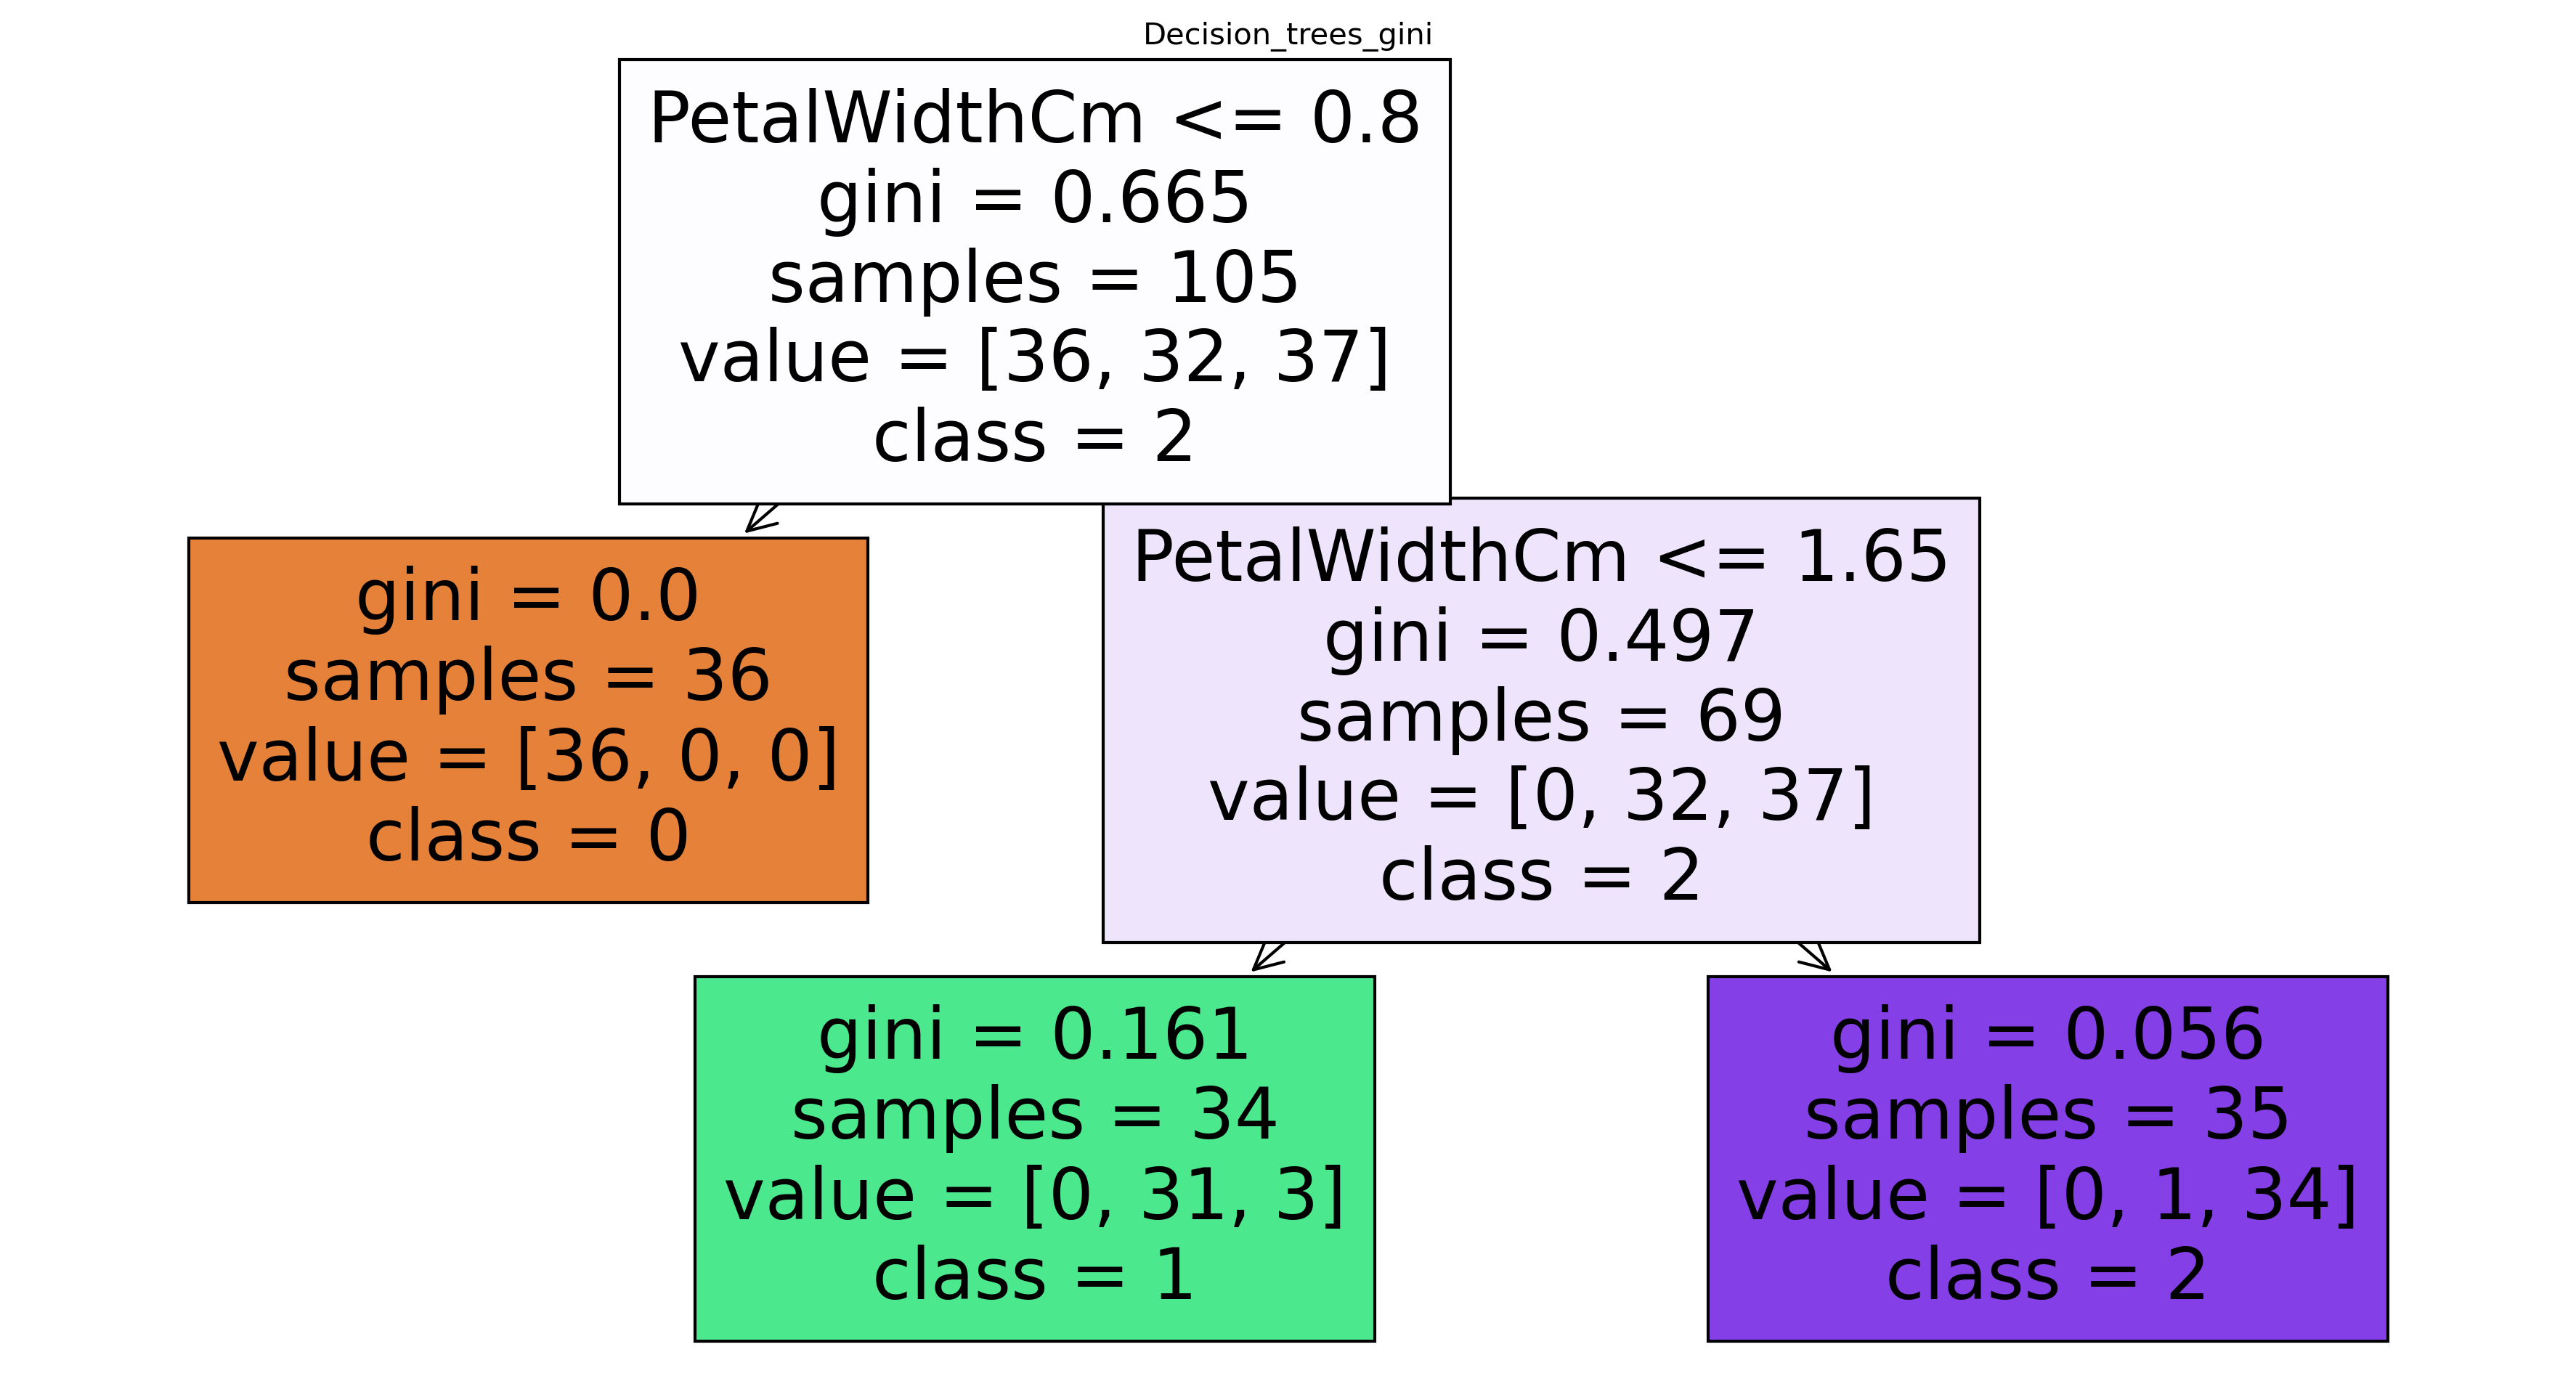

In [47]:
fn=list(x_train)
cn=['0','1','2']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,8),dpi=300)
plot_tree(model,feature_names=fn,class_names=cn,filled=True);
plt.title('Decision_trees_gini',fontsize=10);